### References.
- https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes
- https://www.kaggle.com/gireeshs/volkswagen-price-regression-r-2-0-9555

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_vw = pd.read_csv('vw.csv')
data_vw

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


In [3]:
data_vw.shape

(15157, 9)

In [4]:
data_vw.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [5]:
data_vw.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


In [6]:
data_vw["transmission"].value_counts()

Manual       9417
Semi-Auto    3780
Automatic    1960
Name: transmission, dtype: int64

<AxesSubplot:xlabel='transmission', ylabel='count'>

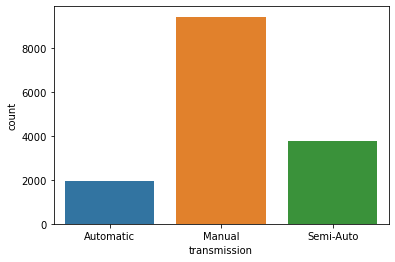

In [7]:
sns.countplot(data_vw["transmission"])

In [8]:
data_vw["fuelType"].value_counts()

Petrol    8553
Diesel    6372
Hybrid     145
Other       87
Name: fuelType, dtype: int64

<AxesSubplot:xlabel='fuelType', ylabel='count'>

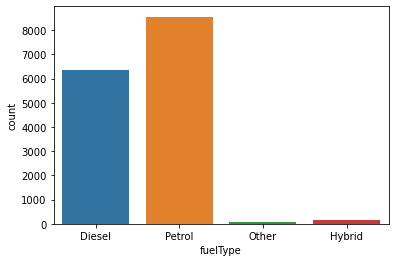

In [9]:
sns.countplot(data_vw['fuelType'])

<AxesSubplot:xlabel='year', ylabel='price'>

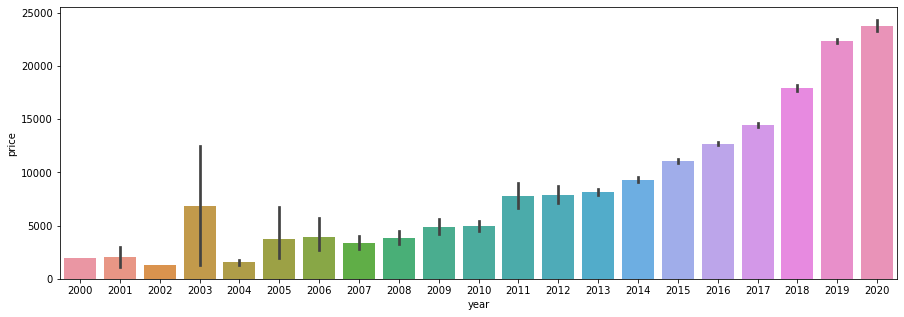

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x=data_vw['year'], y=data_vw['price'])

<AxesSubplot:xlabel='transmission', ylabel='price'>

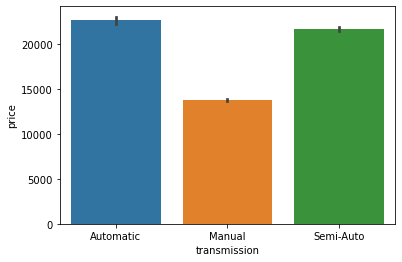

In [11]:
sns.barplot(x=data_vw['transmission'], y=data_vw['price'])

In [12]:
data_vw = pd.get_dummies(data=data_vw, columns = ['model', 'transmission', 'fuelType'])

In [13]:
data_vw.shape

(15157, 40)

In [14]:
data_vw

,year,price,mileage,tax,mpg,engineSize,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,...,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2019,25000,13904,145,49.6,2.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,2019,26883,4562,145,49.6,2.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,2019,20000,7414,145,50.4,2.0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,2019,33492,4825,145,32.5,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2019,22900,6500,150,39.8,1.5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15152,2012,5990,74000,125,58.9,2.0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
15153,2008,1799,88102,145,46.3,1.2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
15154,2009,1590,70000,200,42.0,1.4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
15155,2006,1250,82704,150,46.3,1.2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [15]:
X=data_vw.drop('price', axis=1)
y=data_vw['price']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
X_train

,year,mileage,tax,mpg,engineSize,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,model_ Caddy,...,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
9703,2020,1000,145,45.6,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
656,2020,250,145,39.8,1.5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
564,2019,10505,150,44.1,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
12190,2016,77832,20,62.8,1.0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
241,2019,2819,145,42.2,1.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11791,2019,9253,145,39.8,2.0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
12609,2017,35285,20,64.2,1.0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2212,2019,6000,145,44.8,1.5,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
11967,2019,21,150,41.5,2.0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [18]:
X_test

,year,mileage,tax,mpg,engineSize,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,model_ Caddy,...,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
3092,2019,15601,145,57.7,1.6,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1652,2016,20785,20,60.1,1.4,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
11438,2017,20331,145,57.6,2.0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1645,2019,11020,145,57.7,1.6,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4613,2015,52210,0,68.9,1.6,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4458,2015,75000,20,67.3,2.0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
6807,2020,3000,145,47.9,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
9725,2017,32860,20,60.1,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
12920,2019,50,145,54.3,1.0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [31]:
from sklearn.metrics import make_scorer

def rmsle(predicted_val, actual_val):
    predicted_val = np.array(predicted_val)
    actual_val = np.array(actual_val)
    
    log_predict = np.log(predicted_val+1)
    log_actual = np.log(actual_val+1)
    
    diff = log_predict-log_actual
    diff = np.square(diff)
    
    score = np.sqrt(diff.mean())
    
    return score
    
rmsle_scorer = make_scorer(rmsle)

In [124]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators=100,
                             n_jobs=-1,
                             random_state=0)
rfreg.fit(X_train, y_train)
rfpred=rfreg.predict(X_test)
rfpred

array([20218.01      , 25143.3       , 14475.83      , ...,
       17264.89      , 24385.57      , 17344.14666667])

In [125]:
rf_score = rmsle(y_test, rfpred)
rf_score

0.09674884731957424

In [126]:
rf_score = cross_val_score(rfreg, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
rf_score.mean()

0.09701200119620274

### Gradient Boost

In [127]:
from sklearn.ensemble import GradientBoostingRegressor
gbreg = GradientBoostingRegressor(n_estimators=4000,
                               alpha=0.01)
gbreg.fit(X_train, y_train)
gbpred = gbreg.predict(X_test)
gbpred

array([19921.18514064, 25960.91384846, 13748.42030656, ...,
       17075.81437041, 25999.27533157, 16890.52031382])

In [128]:
gb_score = rmsle(y_test, gbpred)
gb_score

0.09702156487304213

In [129]:
gb_score = cross_val_score(gbreg, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
gb_score.mean()

nan

In [32]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression(normalize=True)
lreg.fit(X_train, y_train)


lpred = lreg.predict(X_test)
lpred

array([16698.5, 13927. , 21294. , ...,  9606. , 11979. ,  6566. ])

In [33]:
lreg.score(X_train, y_train)

0.8902229205189133

In [34]:
lreg.score(X_test, y_test)

0.8839934147789

In [37]:
score = cross_val_score(lreg, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
print(f"score: {score}, \n mean: {score.mean()}, \n std: {score.std()}")

score: [-6362651.14591921 -6233737.20763345 -5638893.80791426 -6739688.46502731
 -6668705.58532564 -6319088.27062706 -6661559.45109291 -7477638.84674092
 -8208020.23339521 -6648013.25886964], 
 mean: -6695799.627254562, 
 std: 669899.3146756628


In [39]:
from sklearn.metrics import mean_squared_error, r2_score

l_train_pred = lreg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, l_train_pred)))
r2 = r2_score(y_train, l_train_pred)
print(f"rmse: {rmse}, r2 score: {r2}")

rmse: 2575.920835660061, r2 score: 0.8902229205189133


In [40]:
l_test_pred = lreg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, l_test_pred)))
r2 = r2_score(y_test, l_test_pred)
print(f"rmse: {rmse}, r2 score: {r2}")

rmse: 2613.5383515216818, r2 score: 0.8839934147789


In [132]:
from sklearn.linear_model import Ridge
ridreg = Ridge()
ridreg.fit(X_train, y_train)
ridpred = ridreg.predict(X_test)
ridpred

array([19849.63982072, 35228.47644206, 13695.72280496, ...,
       14978.73443105, 23279.9396321 , 16925.61584399])

In [133]:
ridscore = rmsle(y_test, ridpred)
ridscore

nan